# Handwritten Digit Recognition with MNIST (28x28)

A compact, classical ML pipeline using the official MNIST train/test split.


## 1. Load the Official MNIST Dataset

The data already comes split into training and testing CSV files.


In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

X_train = train_df.drop("label", axis=1).values
y_train = train_df["label"].values
X_test = test_df.drop("label", axis=1).values
y_test = test_df["label"].values

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (60000, 784)
Testing samples: (10000, 784)


## 2. A Sample of the Training Dataset


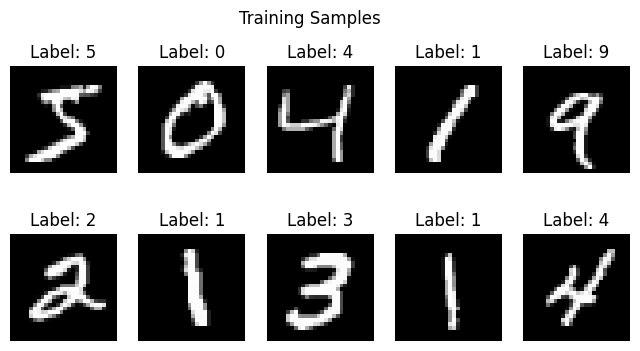

In [3]:
plt.figure(figsize=(8, 4))
for i in range(10):
    img = X_train[i].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.suptitle("Training Samples")
plt.show()


## 3. A Sample of the Testing Dataset

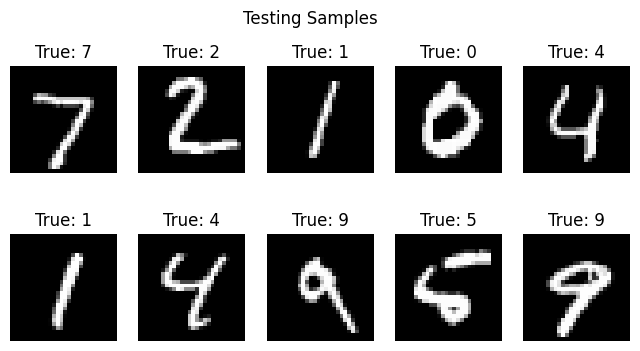

In [4]:
plt.figure(figsize=(8, 4))
for i in range(10):
    img = X_test[i].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {y_test[i]}")
    plt.axis("off")
plt.suptitle("Testing Samples")
plt.show()


## 4. Defining Models and Feature Selection

normalizing inputs to [0, 1] and select the top k features using chi-square.


In [5]:
K_BEST = 200

models = {
    "Decision Tree": Pipeline([
        ("scaler", MinMaxScaler()),
        ("select", SelectKBest(score_func=chi2, k=K_BEST)),
        ("model", DecisionTreeClassifier(random_state=42)),
    ]),
    "Random Forest": Pipeline([
        ("scaler", MinMaxScaler()),
        ("select", SelectKBest(score_func=chi2, k=K_BEST)),
        ("model", RandomForestClassifier(n_estimators=200, random_state=42)),
    ]),
    "KNN": Pipeline([
        ("scaler", MinMaxScaler()),
        ("select", SelectKBest(score_func=chi2, k=K_BEST)),
        ("model", KNeighborsClassifier(n_neighbors=5)),
    ]),
    "SVM": Pipeline([
        ("scaler", MinMaxScaler()),
        ("select", SelectKBest(score_func=chi2, k=K_BEST)),
        ("model", SVC(kernel="rbf", gamma="scale")),
    ]),
    "ANN (MLP)": Pipeline([
        ("scaler", MinMaxScaler()),
        ("select", SelectKBest(score_func=chi2, k=K_BEST)),
        ("model", MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)),
    ]),
    "Naive Bayes": Pipeline([
        ("scaler", MinMaxScaler()),
        ("select", SelectKBest(score_func=chi2, k=K_BEST)),
        ("model", GaussianNB()),
    ]),
}


## 5. Training, Testing, and Evaluating Models


In [6]:
results = []
best_model_name = None
best_accuracy = 0.0
best_predictions = None

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
    })

    print(f"{name} Accuracy: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_predictions = y_pred


Decision Tree Accuracy: 0.8601
Random Forest Accuracy: 0.9530
KNN Accuracy: 0.9480
SVM Accuracy: 0.9677
ANN (MLP) Accuracy: 0.9616
Naive Bayes Accuracy: 0.7119


## 6. Comparing results and saving them in a csv file


In [7]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nFinal Results:")
print(results_df)

results_df.to_csv("mnist_28x28_model_results.csv", index=False)



Final Results:
           Model  Accuracy
3            SVM    0.9677
4      ANN (MLP)    0.9616
1  Random Forest    0.9530
2            KNN    0.9480
0  Decision Tree    0.8601
5    Naive Bayes    0.7119


## 7. Confusion Matrix for the Best Model

Diagonal values are correct predictions; off-diagonal values are misclassifications.


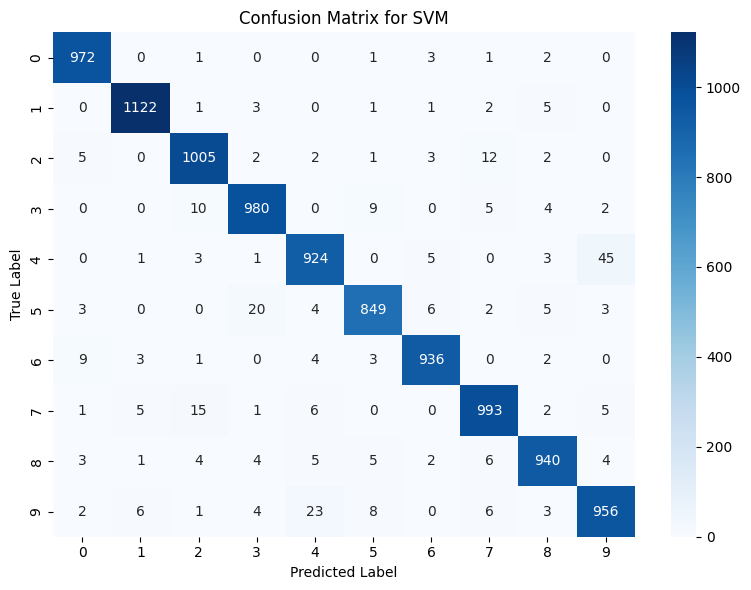


Best Model: SVM
Best Accuracy: 0.9677


In [8]:
labels = list(range(10))
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("mnist_28x28_confusion_matrix.png")
plt.show()

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")


## 8. Sample Predictions


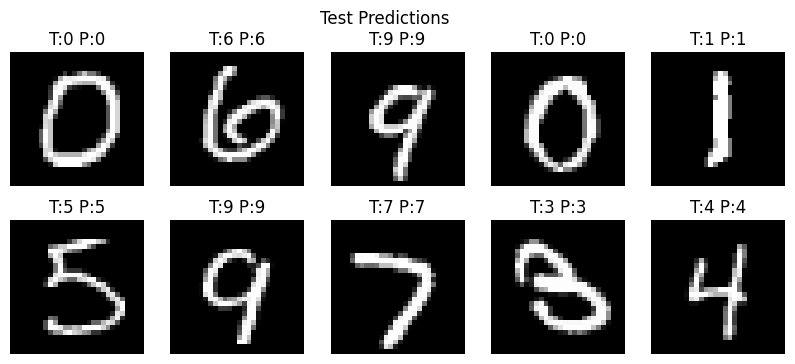

In [11]:
start = 10
end = 20

best_model = models[best_model_name]
preds = best_model.predict(X_test[start:end])

plt.figure(figsize=(10, 4))
for i in range(start, end):
    img = X_test[i].reshape(28, 28)
    plt.subplot(2, 5, i - start + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test[i]} P:{preds[i - start]}")
    plt.axis("off")
plt.suptitle("Test Predictions")
plt.show()
